In [1]:
import itertools
import numpy as np
import random
import pickle
import matplotlib.pyplot as plt
from math import *
import scipy
from tqdm import tqdm

from utils import *
from ODE_utils import *

import matplotlib as mpl
import pandas as pd
import multiprocessing

# Set the default font and size
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['font.size'] = 16

In [16]:
# load the data for the community outcomes
R = 4
path_orig = "../data/ecol_adv_no_lag"
path = "../data/seq_vs_co_param"
rhos = np.linspace(0, 0.4, 51)
# get the result for pairwise
all_frac_diaux_pair = []
D = 100
gsigma = 0.1
frac_diaux_pair = []
for rho in tqdm(rhos):
    data = pickle.load(open(os.path.join(path, f"pairwise_rho={rho}_D={D}_gsigma={gsigma}.pkl"), "rb"))
    basic = data["basic"]
    D, gC, Nseq, Ncout = basic["D"], basic["gC"], basic["Nseq"], basic["Ncout"]
    states = data["end"]["states"]
    ids = [i["ids"] for i in states]
    ids_list = sum(ids, [])
    frac_diaux_pair.append(len([i for i in ids_list if i<Nseq])/len(ids_list))
all_frac_diaux_pair.append(frac_diaux_pair)

frac_diaux_pair = []
for rho in tqdm(rhos):
    data = pickle.load(open(os.path.join(path_orig, f"pairwise_rho={rho}.pkl"), "rb"))
    basic = data["basic"]
    D, gC, Nseq, Ncout = basic["D"], basic["gC"], basic["Nseq"], basic["Ncout"]
    states = data["end"]["states"]
    ids = [i["ids"] for i in states]
    ids_list = sum(ids, [])
    frac_diaux_pair.append(len([i for i in ids_list if i<Nseq])/len(ids_list))
all_frac_diaux_pair.append(frac_diaux_pair)

D = 10000
gsigma = 0.1
frac_diaux_pair = []
for rho in tqdm(rhos):
    data = pickle.load(open(os.path.join(path, f"pairwise_rho={rho}_D={D}_gsigma={gsigma}.pkl"), "rb"))
    basic = data["basic"]
    D, gC, Nseq, Ncout = basic["D"], basic["gC"], basic["Nseq"], basic["Ncout"]
    states = data["end"]["states"]
    ids = [i["ids"] for i in states]
    ids_list = sum(ids, [])
    frac_diaux_pair.append(len([i for i in ids_list if i<Nseq])/len(ids_list))
all_frac_diaux_pair.append(frac_diaux_pair)

all_frac_diaux = []
frac_diaux = []
divs = []
stratified = []
D = 100
gsigma = 0.1
for rho in tqdm(rhos):
    if not os.path.exists(os.path.join(path, f"full_rho={rho}_D={D}_gsigma={gsigma}.pkl")):
        continue
    rhos_alt.append(rho)
    data = pickle.load(open(os.path.join(path, f"full_rho={rho}_D={D}_gsigma={gsigma}.pkl"), "rb"))
    states = data["end"]["states"]
    Nseq = data["basic"]["Nseq"]
    ids = [i["ids"] for i in states]
    ids_list = sum(ids, [])
    frac_diaux.append(len([i for i in ids_list if i<Nseq])/len(ids_list))
    divs.append([min(4, len(i)) for i in ids])
    frac_diaux_strat = []
    lenlist = []
    for num in range(R):
        ids_list = sum([i for i in ids if len(i)==num+1], [])
        if(len(ids_list)>0):
            frac_diaux_strat.append(len([i for i in ids_list if i<Nseq])/len(ids_list))
        else:
            frac_diaux_strat.append(0)
        lenlist.append([len(i) for i in ids].count(num+1))
    stratified.append([lenlist, frac_diaux_strat])
all_frac_diaux.append(frac_diaux)

frac_diaux = []
div = []
for rho in tqdm(rhos):
    data = pickle.load(open(os.path.join(path_orig, f"full_rho={rho}.pkl"), "rb"))
    states = data["end"]["states"]
    Nseq = data["basic"]["Nseq"]
    ids = [i["ids"] for i in states]
    ids_list = sum(ids, [])
    frac_diaux.append(len([i for i in ids_list if i<Nseq])/len(ids_list))
    div.append(np.mean([len(i) for i in ids]))
all_frac_diaux.append(frac_diaux)

frac_diaux = []
D = 10000
gsigma = 0.1
for rho in tqdm(rhos):
    if not os.path.exists(os.path.join(path, f"full_rho={rho}_D={D}_gsigma={gsigma}.pkl")):
        continue
    data = pickle.load(open(os.path.join(path, f"full_rho={rho}_D={D}_gsigma={gsigma}.pkl"), "rb"))
    states = data["end"]["states"]
    Nseq = data["basic"]["Nseq"]
    ids = [i["ids"] for i in states]
    ids_list = sum(ids, [])
    frac_diaux.append(len([i for i in ids_list if i<Nseq])/len(ids_list))
    divs.append([min(4, len(i)) for i in ids])
    frac_diaux_strat = []
    lenlist = []
    for num in range(R):
        ids_list = sum([i for i in ids if len(i)==num+1], [])
        if(len(ids_list)>0):
            frac_diaux_strat.append(len([i for i in ids_list if i<Nseq])/len(ids_list))
        else:
            frac_diaux_strat.append(0)
        lenlist.append([len(i) for i in ids].count(num+1))
    stratified.append([lenlist, frac_diaux_strat])
all_frac_diaux.append(frac_diaux)

100%|██████████| 51/51 [00:56<00:00,  1.11s/it]


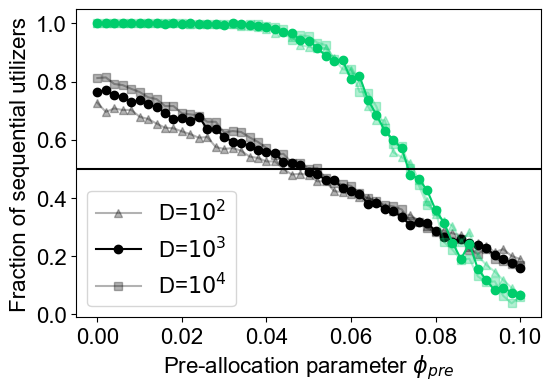

In [24]:
plt.rcParams["figure.figsize"] = (6,4)
alpha_list = [0.3, 1, 0.3]
shape_list = ['^', "o", "s"]
D_list = ["$10^2$", "$10^3$", "$10^4$"]
# a datapt is corrupted
rhos_alt = np.hstack([rhos[:29], rhos[30:]])
rhos_list = [rhos, rhos, rhos_alt]
for idx, frac_diaux_pair in enumerate(all_frac_diaux_pair):
    plt.plot([i/R for i in rhos], frac_diaux_pair[:len(rhos)], marker=shape_list[idx], c="k", alpha=alpha_list[idx], label=f"D={D_list[idx]}")
for idx, frac_diaux in enumerate(all_frac_diaux):
    plt.plot([i/R for i in rhos_list[idx]], frac_diaux[:len(rhos)], marker=shape_list[idx], c="#00CD6C", alpha=alpha_list[idx])
plt.axhline(0.5, c='k')
plt.xlabel("Pre-allocation parameter $\phi_{pre}$")
plt.ylabel("Fraction of sequential utilizers")
plt.legend()

plt.savefig("../figures/div_vs_frac_diaux_D.pdf", bbox_inches="tight")